In [32]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [33]:
url = 'https://www.meshstats.xyz/meshstats/api.php?latitude=34.9973787377006&longitude=135.780029296875&distance=10&func=jobsmesh&key=ANwbR7yIsQMZ2LM'
data = DataFrame(pd.read_csv(url))

In [34]:
def cal_mean(x):
    return Series([(x["latitude0"]+x["latitude1"])/2, (x["longitude0"]+x["longitude1"])/2], index=['lat_mean', 'lon_mean'])

In [35]:
m = data.apply(cal_mean, axis=1)
data = pd.concat([data, m], axis=1)

In [36]:
data.describe()

,世界メッシュコード,latitude0,longitude0,latitude1,longitude1,北側東西幅 (km),南側東西幅 (km),南北幅 (km),面積 (km<SUP>2</SUP>),最低標高 (m),...,ドライバー,美容・エステ・ネイル,医療・看護・介護,接客・サービス,アミューズメント,軽作業・清掃・警備・引越し,製造・組立・建設・他作業,ファッション・アパレル,lat_mean,lon_mean
count,7.800000e+02,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,2.052354e+09,34.997863,135.781250,34.989530,135.793750,1.141131,1.141247,0.923467,1.053851,83.761795,...,0.010256,0.415385,0.189744,0.825641,0.002564,0.087179,0.028205,0.053846,34.993697,135.787500
std,5.448187e+02,0.046971,0.072125,0.046971,0.072125,0.000652,0.000652,0.000008,0.000593,77.523934,...,0.123689,2.103062,2.038121,3.253967,0.050604,1.189423,0.556649,0.485659,0.046971,0.072125
min,2.052353e+09,34.916667,135.662500,34.908333,135.675000,1.140060,1.140176,0.923453,1.052877,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.912500,135.668750
25%,2.052354e+09,34.958333,135.721875,34.950000,135.734375,1.140523,1.140639,0.923460,1.053299,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.954166,135.728125
50%,2.052354e+09,35.000000,135.781250,34.991667,135.793750,1.141102,1.141218,0.923467,1.053824,69.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.995833,135.787500
75%,2.052355e+09,35.041667,135.840625,35.033333,135.853125,1.141680,1.141796,0.923476,1.054349,102.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.037500,135.846875
max,2.052355e+09,35.075000,135.900000,35.066667,135.912500,1.142258,1.142373,0.923480,1.054875,533.300000,...,2.000000,30.000000,29.000000,39.000000,1.000000,23.000000,11.000000,8.000000,35.070833,135.906250


In [56]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8,4))
lllat=34.9
urlat=35.1
lllon=135.5
urlon=136

map = Basemap(projection='merc', 
              resolution='f', 
              llcrnrlon=lllon, 
              llcrnrlat=lllat, 
              urcrnrlon=urlon,
              urcrnrlat=urlat)

map.drawcoastlines(color='lightgray')
map.drawstates(color='lightgray')
map.drawcountries(color='lightgray')
map.fillcontinents(color='white', lake_color='#eeeeee');
map.drawmapboundary(fill_color='#eeeeee')

In [38]:
med = data["事業所数"].median()
q1 = data["事業所数"].quantile(.25)
q3 = data["事業所数"].quantile(.75)
med, q1, q3

(86.0, 1.0, 321.0)

In [39]:
q0Mesh = data.ix[data["事業所数"] < q1, :]
q1Mesh = data.ix[data["事業所数"] < med, :]
q1Mesh = q1Mesh.ix[q1Mesh["事業所数"] >= q1, :]
q2Mesh = data.ix[data["事業所数"] < q3, :]
q2Mesh = q2Mesh.ix[q2Mesh["事業所数"] >= med, :]
q3Mesh = data.ix[data["事業所数"] >= q3, :]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


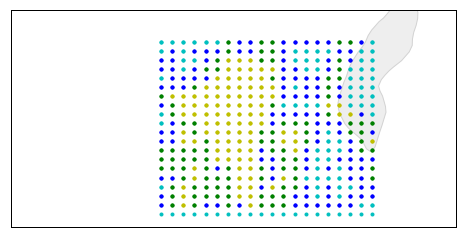

In [57]:
x0 = q0Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[0], axis=1)
y0 = q0Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[1], axis=1)
x1 = q1Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[0], axis=1)
y1 = q1Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[1], axis=1)
x2 = q2Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[0], axis=1)
y2 = q2Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[1], axis=1)
x3 = q3Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[0], axis=1)
y3 = q3Mesh.apply(lambda x: map(x[u"lon_mean"], x[u"lat_mean"])[1], axis=1)

map.plot(x0, y0, 'c.', x1, y1, 'b.', x2, y2, 'g.', x3, y3, 'y.')
plt.show()